# Nonlinear Regression Models

In [48]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [51]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [52]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [55]:
knn_model

KNeighborsRegressor()

In [56]:
knn_model.n_neighbors

5

In [57]:
knn_model.effective_metric_

'euclidean'

## Predict

In [61]:
y_pred = knn_model.predict(X_test)

In [63]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [64]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [68]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [71]:
knn = KNeighborsRegressor()

In [72]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [73]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [75]:
knn_cv_model.best_params_["n_neighbors"]

8

In [76]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [77]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [78]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [80]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# SVR 

In [84]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [85]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [343]:
from sklearn.svm import SVR

In [344]:
svr_model = SVR("linear").fit(X_train, y_train)

TypeError: SVR.__init__() takes 1 positional argument but 2 were given

In [ ]:
svr_model.predict(X_train)[0:5]

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

In [ ]:
X_train["Hits"][0:1]

In [ ]:
-48.69756097561513 + 4.969512195122093*91

In [ ]:
y_pred = svr_model.predict(X_train)

ValueError: x and y must be the same size

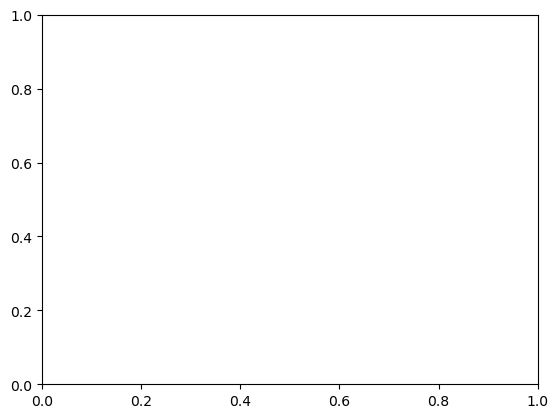

In [345]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [ ]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

In [ ]:
-8.814095480334572 + 5.1724561354706875*91

In [ ]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Predict

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

In [ ]:
svr_model.predict([[91]])

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
svr_model

## Model Tuning

In [ ]:
svr_model

In [ ]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

In [ ]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# Nonlinear SVR

In [ ]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [ ]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

In [ ]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Predict

In [ ]:
y_pred = svr_rbf.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
svr_rbf

In [ ]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

In [ ]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [ ]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

# Çok Katmanlı Algılayıcı

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [ ]:
mlp_model

In [ ]:
mlp_model.n_layers_

In [ ]:
mlp_model.hidden_layer_sizes

## Tahmin

In [ ]:
y_pred = mlp_model.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
mlp_model

In [ ]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [ ]:
mlp_cv_model.fit(X_train_scaled, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [ ]:
mlp_tuned.fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CART

In [ ]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

In [ ]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [ ]:
cart_cv_model.fit(X_train, y_train)

In [ ]:
cart_cv_model.best_params_

In [ ]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [ ]:
cart_tuned.fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# Bagged Trees Regresyon

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

In [ ]:
bag_model.n_estimators

In [ ]:
bag_model.estimators_

In [ ]:
bag_model.estimators_samples_

In [ ]:
bag_model.estimators_features_

In [ ]:
bag_model.estimators_[1]

## Tahmin

In [151]:
y_pred = bag_model.predict(X_test)

NameError: name 'bag_model' is not defined

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [153]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

NameError: name 'iki_y_pred' is not defined

In [ ]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [154]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

NameError: name 'yedi_y_pred' is not defined

# Model Tuning

In [155]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [157]:
bag_params = {"n_estimators": range(2,20)}

In [158]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [159]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [160]:
bag_cv_model.best_params_

{'n_estimators': 18}

In [161]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [162]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [163]:
y_pred = bag_tuned.predict(X_test)

In [166]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.58918618105673

# Random Forests

In [171]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [177]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
rf_model = RandomForestRegressor(random_state = 42)

In [186]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [191]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [199]:
y_pred = rf_model.predict(X_test)

In [203]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [205]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [206]:
rf_model = RandomForestRegressor(random_state = 42)

In [207]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [210]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [212]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [213]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [215]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [218]:
y_pred = rf_tuned.predict(X_test)

In [219]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.853725627977

In [220]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

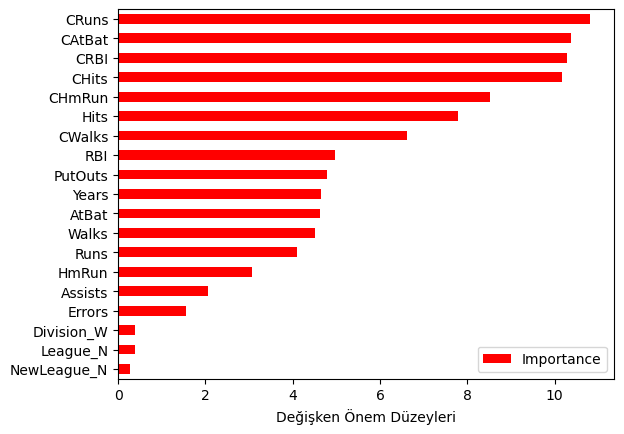

In [221]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [223]:
from sklearn.ensemble import GradientBoostingRegressor

In [224]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [226]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

354.54112660540216

## Model Tuning

In [228]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [229]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [230]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.75}

In [231]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [232]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

323.08475010087324

In [233]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

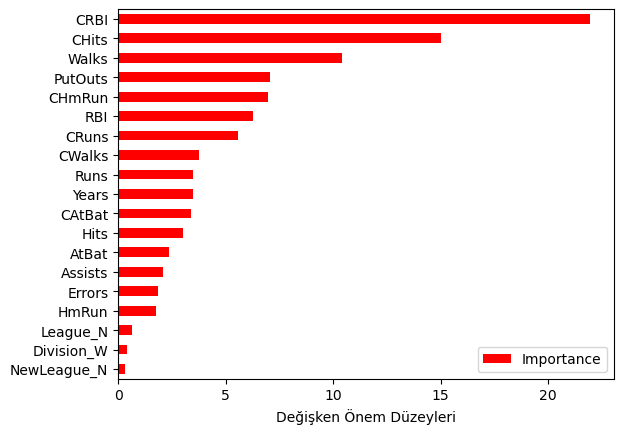

In [234]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [236]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [237]:
#!pip install xgboost

In [238]:
import xgboost as xgb

In [239]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [240]:
from xgboost import XGBRegressor

In [241]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [243]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

366.3863437634965

## Model Tuning

In [245]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [246]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [247]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=Non...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [248]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [249]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [250]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

358.4814337048325

# Light GBM

In [252]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [253]:
#!pip install lightgbm

In [254]:
from lightgbm import LGBMRegressor

In [255]:
#conda install -c conda-forge lightgbm

In [256]:
from lightgbm import LGBMRegressor

In [257]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

## Tahmin

In [259]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [260]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [262]:
lgbm_model

LGBMRegressor()

In [263]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [264]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [265]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [266]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [267]:
y_pred = lgbm_tuned.predict(X_test)

In [268]:
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238

# CatBoost

In [270]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [271]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.8/102.4 MB 1.0 MB/s eta 0:01:37
   ---------------------------------------- 1.0/102.4 MB 1.1 MB/s eta 0:01:29
    --------------------------------------- 1.3/102.4 MB 1.2 MB/s eta 0:01:22
    --------------------------------------- 1.6/102.4 MB 1.3 MB/s eta 0:01:20
    --------------------------------------- 1.8/102.4 MB 1.3 MB/s eta 0:01:19
    --------------------------------------- 2.1/102.4 MB 1.2 MB/s eta 0:01:21
    --------------------------------------- 2.4/102.4 MB 1.2 MB/s eta 0:01:21
   - -------------------------------------- 2.6/102.4 MB 1.2 MB/s eta 0:01:22
   - ---------

In [272]:
from catboost import CatBoostRegressor

In [273]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 156ms	remaining: 2m 35s
1:	learn: 431.3923642	total: 157ms	remaining: 1m 18s
2:	learn: 424.8820360	total: 158ms	remaining: 52.4s
3:	learn: 418.2514904	total: 159ms	remaining: 39.5s
4:	learn: 412.6394021	total: 159ms	remaining: 31.7s
5:	learn: 406.6247020	total: 160ms	remaining: 26.5s
6:	learn: 400.5321206	total: 161ms	remaining: 22.8s
7:	learn: 394.6683437	total: 162ms	remaining: 20.1s
8:	learn: 388.2496484	total: 162ms	remaining: 17.9s
9:	learn: 382.9448842	total: 163ms	remaining: 16.2s
10:	learn: 377.2600080	total: 164ms	remaining: 14.8s
11:	learn: 372.4829606	total: 165ms	remaining: 13.6s
12:	learn: 366.6823437	total: 166ms	remaining: 12.6s
13:	learn: 362.6076230	total: 166ms	remaining: 11.7s
14:	learn: 358.0107745	total: 167ms	remaining: 11s
15:	learn: 353.2802665	total: 168ms	remaining: 10.3s
16:	learn: 348.5646265	total: 169ms	remaining: 9.75s
17:	learn: 343.6407912	total: 169ms	remaining: 9.24s
18:	learn: 339.2363847	tot

## Tahmin

In [275]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [277]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [278]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [279]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 1.06ms	remaining: 1.06s
1:	learn: 404.1864276	total: 2.33ms	remaining: 1.16s
2:	learn: 386.3231718	total: 3.12ms	remaining: 1.04s
3:	learn: 370.5548032	total: 3.96ms	remaining: 986ms
4:	learn: 354.9242038	total: 4.79ms	remaining: 954ms
5:	learn: 342.3403984	total: 5.68ms	remaining: 941ms
6:	learn: 328.2370070	total: 6.51ms	remaining: 924ms
7:	learn: 317.5056526	total: 7.5ms	remaining: 931ms
8:	learn: 306.6243511	total: 8.44ms	remaining: 929ms
9:	learn: 297.3147023	total: 9.18ms	remaining: 909ms
10:	learn: 288.3685892	total: 9.83ms	remaining: 884ms
11:	learn: 281.0996220	total: 10.5ms	remaining: 868ms
12:	learn: 273.2254898	total: 11.4ms	remaining: 866ms
13:	learn: 266.9003385	total: 12.2ms	remaining: 857ms
14:	learn: 261.9092500	total: 12.9ms	remaining: 845ms
15:	learn: 256.2637350	total: 13.7ms	remaining: 840ms
16:	learn: 250.3667935	total: 14.5ms	remaining: 837ms
17:	learn: 244.8631098	total: 1

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000222DB1E2D20>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))